In [1]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

## 准备数据

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
Path.BASE_PATH = path

In [5]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [6]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png'),Path('train/3/10093.png'),Path('train/3/10097.png'),Path('train/3/10099.png'),Path('train/3/10116.png'),Path('train/3/10125.png'),Path('train/3/10137.png'),Path('train/3/10141.png'),Path('train/3/10144.png'),Path('train/3/10155.png'),Path('train/3/10161.png')...]

In [7]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [10]:
array(im3)[4:40,4:20]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0],
       [  0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0],
       [  0,  93, 244, 249, 253, 187,  46,  10,   8,   4,  10, 194, 253, 253, 233,   0],
       [  0, 107, 253, 253, 230,  48,   0,   0,   0,   0,   0, 192, 253, 253, 156,   0],
       [  0,   3,  20,  20,  15,   0,   0,   0,   0,   0,  43, 224, 253, 245,  74,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 249, 253, 245, 126,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  14, 101, 223, 253, 248, 124,   0,   0,   0],
       [  0,   0,   0,   0,   0,  11, 166, 239, 253, 253, 253, 187,  30,   0,   0,   0],
       [  0,   0,   0,   0,   0,  16, 248, 250, 253, 253, 253, 253, 232, 213, 111,   2],
       [  0,   0,   0,   0,   0,   0,   0,  43,  98,  98, 208, 253, 253, 253, 253, 187],
       [  0,   0,   0

In [11]:
tensor(im3)[4:40,4:20]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0],
        [  0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0],
        [  0,  93, 244, 249, 253, 187,  46,  10,   8,   4,  10, 194, 253, 253, 233,   0],
        [  0, 107, 253, 253, 230,  48,   0,   0,   0,   0,   0, 192, 253, 253, 156,   0],
        [  0,   3,  20,  20,  15,   0,   0,   0,   0,   0,  43, 224, 253, 245,  74,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 249, 253, 245, 126,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  14, 101, 223, 253, 248, 124,   0,   0,   0],
        [  0,   0,   0,   0,   0,  11, 166, 239, 253, 253, 253, 187,  30,   0,   0,   0],
        [  0,   0,   0,   0,   0,  16, 248, 250, 253, 253, 253, 253, 232, 213, 111,   2],
        [  0,   0,   0,   0,   0,   0,   0,  43,  98,  98, 208, 253, 253, 253, 253, 187],
        [ 

In [12]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:40,4:22])
# 这会根据单元格数值的大小自动生成深浅不同的灰色背景，数值越大（或越小，取决于具体配置）背景色越深，
# 便于直观地观察数据的大小分布。
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [13]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

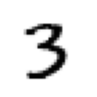

In [14]:
show_image(three_tensors[1]);

In [26]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [33]:
a= tensor([1,2,3])
b = tensor([4,5,6])
ab = torch.stack((a,b))

In [34]:
ab.shape, ab

(torch.Size([2, 3]),
 tensor([[1, 2, 3],
         [4, 5, 6]]))

In [42]:
a= [tensor([1,2,3]),tensor([4,5,6])]
ab = torch.stack(a)
a, ab, ab.shape

([tensor([1, 2, 3]), tensor([4, 5, 6])],
 tensor([[1, 2, 3],
         [4, 5, 6]]),
 torch.Size([2, 3]))

In [43]:
stacked_threes.ndim

3

## 用传统方法计算相似性

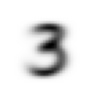

In [44]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

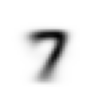

In [45]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

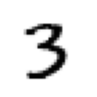

In [46]:
a_3 = stacked_threes[1]
show_image(a_3);

In [47]:
dist_3_abs = (a_3 - mean3).abs().mean() # 平均绝对差（mean absolute difference）或L1范数（L1 norm）
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt() # 均方根误差（root mean squared error，RMSE）或L2范数（L2 norm）
dist_3_abs,dist_3_sqr
#L1范数和均方误差（MSE）的区别在于，后者对较大的误差的惩罚会比前者更严厉（而对小误差则更为宽容）。

(tensor(0.1114), tensor(0.2021))

In [48]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [49]:
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [50]:
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)
arr, tns

(array([[1, 2, 3],
        [4, 5, 6]]),
 tensor([[1, 2, 3],
         [4, 5, 6]]))

In [51]:
tns[1], tns[:, 1]

(tensor([4, 5, 6]), tensor([2, 5]))

In [52]:
tns[1,1:3]

tensor([5, 6])

In [53]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [54]:
tns.type()

'torch.LongTensor'

In [55]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

In [57]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

<Axes: >

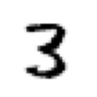

In [59]:
show_image(valid_3_tens[1])

In [69]:
valid_3_tens[1, 4:40, 4:18]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.2157, 0.5255, 0.6118, 0.7608, 0.6118, 0.9647, 0.9961, 1.0000, 0.9961, 0.9961, 0.9333, 0.6118],
        [0.0000, 0.2627, 0.9804, 0.9922, 0.9961, 0.9922, 0.9922, 0.9922, 0.9922, 0.9961, 0.9922, 0.9373, 0.9569, 0.9922],
        [0.0000, 0.0941, 0.8196, 0.9922, 0.9961, 0.7294, 0.6824, 0.5373, 0.5373, 0.3059, 0.3059, 0.0941, 0.2706, 0.9922],
        [0.0000, 0.0000, 0.0431, 0.0745, 0.0745, 0.0118, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3608, 0.9922],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1216, 0.8588, 0.9922],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0510, 0.8784, 0.9961, 0.9961],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0510, 0.2980, 0.9922, 0.9922, 0.9922],
        [0.0000, 0.0000,

In [70]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [71]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1634, 0.1145, 0.1363,  ..., 0.1105, 0.1111, 0.1640]),
 torch.Size([1010]))

In [72]:
tensor([1,2,3]) + tensor([1,1,1])

tensor([2, 3, 4])

In [74]:
tensor([[1,2,3],[5,6,7]]) + tensor([1,1,1])

tensor([[2, 3, 4],
        [6, 7, 8]])

In [75]:
(valid_3_tens-mean3).shape

torch.Size([1010, 28, 28])

In [76]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [77]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [78]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [79]:
is_3(valid_3_tens).shape

torch.Size([1010])

In [80]:
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

## 随机梯度下降 (SGD)¶

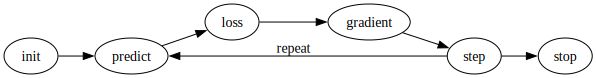

In [81]:
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

In [82]:
def f(x): return x**2

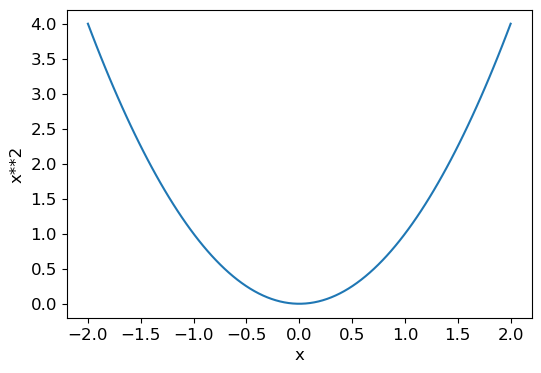

In [83]:
plot_function(f, 'x', 'x**2')

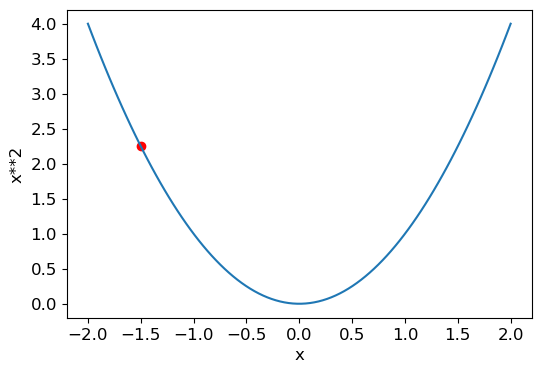

In [84]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

In [95]:
xt = tensor(3.).requires_grad_()
xt, xt.grad

(tensor(3., requires_grad=True), None)

In [96]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [97]:
yt.backward()

In [98]:
xt.grad 
# x**2的导数是2*x，而我们这里的x值为3，所以梯度应该是2*3=6，这与PyTorch计算出的结果一致！

tensor(6.)

In [118]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [119]:
def f(x): return (x**2).sum() # 只能为标量输出（即形状为 () 的张量）计算梯度。

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [120]:
yt.backward()
xt.grad # 梯度只告诉我们函数的斜率，并没有确切告诉我们参数应该调整多少。

tensor([ 6.,  8., 20.])

### 使用学习率进行调整
w -= gradient(w) * lr

### 一个端到端的随机梯度下降（SGD）示例

In [124]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

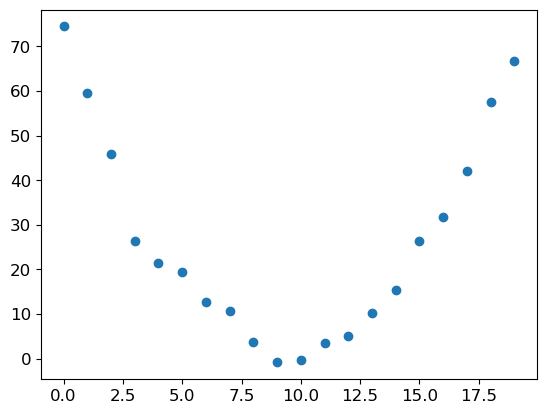

In [125]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [122]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [123]:
def mse(preds, targets): return ((preds-targets)**2).mean().sqrt()

#### 步骤1：初始化参数

In [178]:
params = torch.randn(3).requires_grad_()
params

tensor([-0.6890, -1.1267, -0.2858], requires_grad=True)

In [179]:
orig_params = params.clone()
orig_params

tensor([-0.6890, -1.1267, -0.2858], grad_fn=<CloneBackward0>)

In [180]:
# 为什么用clone？
params_test = torch.randn(3)
orig_params_test = params_test
params_test, orig_params_test

(tensor([-1.0935,  1.1351,  0.7592]), tensor([-1.0935,  1.1351,  0.7592]))

In [181]:
params_test[0] = 1.0
params_test, orig_params_test

(tensor([1.0000, 1.1351, 0.7592]), tensor([1.0000, 1.1351, 0.7592]))

In [182]:
params_test = torch.randn(3)
orig_params_test = params_test.clone()
print(f'原始值{params_test}, 克隆值{orig_params_test}')
params_test[0] = 1.0
print(f'变更原始值{params_test}, 克隆值{orig_params_test}')

原始值tensor([-3.5945,  0.0192,  0.1052]), 克隆值tensor([-3.5945,  0.0192,  0.1052])
变更原始值tensor([1.0000, 0.0192, 0.1052]), 克隆值tensor([-3.5945,  0.0192,  0.1052])


#### 步骤2：计算预测值

In [183]:
preds = f(time, params)
preds

tensor([  -0.2858,   -2.1015,   -5.2952,   -9.8670,  -15.8168,  -23.1447,  -31.8506,  -41.9344,  -53.3964,  -66.2363,  -80.4543,  -96.0503, -113.0243, -131.3764, -151.1065, -172.2146, -194.7007,
        -218.5649, -243.8071, -270.4273], grad_fn=<AddBackward0>)

In [184]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

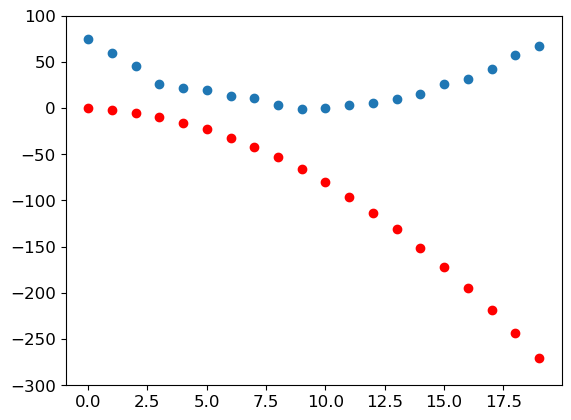

In [185]:
show_preds(preds)

#### 步骤3：计算损失

In [186]:
loss = mse(preds, speed)
loss

tensor(153.3024, grad_fn=<SqrtBackward0>)

#### 步骤4：计算梯度

In [187]:
loss.backward()
params.grad

tensor([-165.1492,  -10.6535,   -0.8002])

In [188]:
params.grad * 1e-5

tensor([-1.6515e-03, -1.0653e-04, -8.0017e-06])

In [189]:
params

tensor([-0.6890, -1.1267, -0.2858], requires_grad=True)

#### 步骤5：更新权重

In [190]:
lr = 1e-4
params.data -= lr * params.grad.data
params.grad = None

In [191]:
params

tensor([-0.6725, -1.1257, -0.2857], requires_grad=True)

In [192]:
preds = f(time,params)
mse(preds, speed)

tensor(150.5644, grad_fn=<SqrtBackward0>)

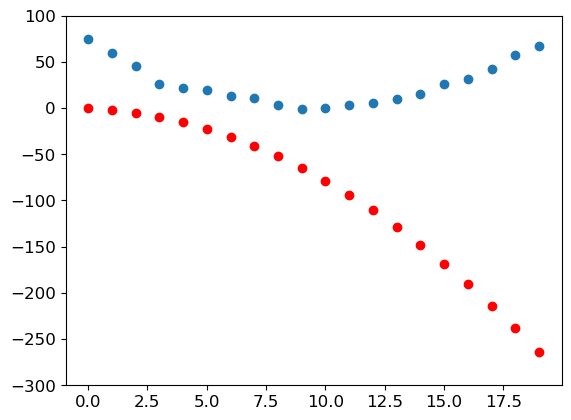

In [193]:
show_preds(preds)

In [194]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

#### 步骤6：重复该过程

In [198]:
for i in range(20): apply_step(params)

142.37017822265625
139.64605712890625
136.92591857910156
134.20999145507812
131.49856567382812
128.79188537597656
126.09025573730469
123.39399719238281
120.70345306396484
118.01899719238281
115.3410415649414
112.67002868652344
110.0064468383789
107.35081481933594
104.70372009277344
102.06578063964844
99.43768310546875
96.8202133178711
94.21414947509766
91.6204605102539


In [208]:
params = orig_params.detach().requires_grad_()
params

tensor([ 0.1254, -1.0738, -0.2812], requires_grad=True)

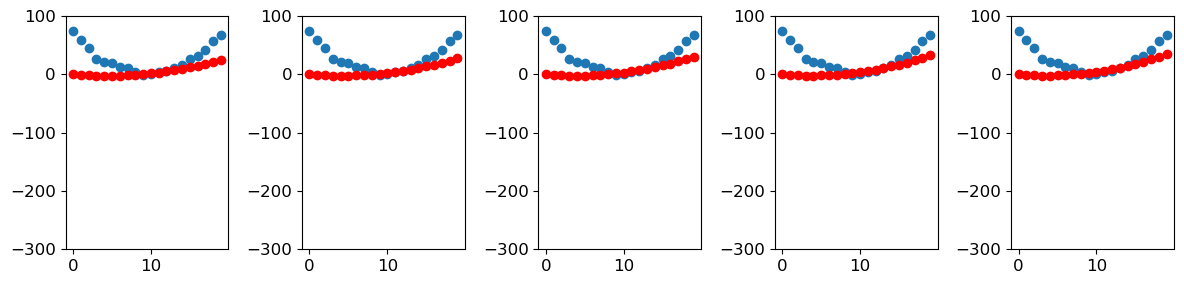

In [209]:
_,axs = plt.subplots(1,5,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

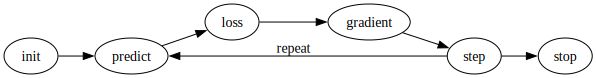

In [210]:
# 看一下总结
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

## MNIST损失函数

In [212]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [213]:
train_x.shape

torch.Size([12396, 784])

In [214]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [215]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [216]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [217]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [218]:
weights = init_params((28*28,1))

In [219]:
# 函数weights*pixels的灵活性不足——当像素值为0时，该函数的值始终为0（即它的“截距”为0）。
# 你可能还记得高中数学里的直线方程y = w*x + b；我们还需要这个b（偏置项）。

bias = init_params(1)

In [223]:
(train_x[0]*weights.T).sum() + bias

tensor([0.2220], grad_fn=<AddBackward0>)

In [224]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[ 0.2220],
        [10.5095],
        [ 8.4926],
        ...,
        [ 9.6805],
        [18.5456],
        [10.7224]], grad_fn=<AddBackward0>)

In [225]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [227]:
corrects.float().mean().item()
# .float() 后变为 tensor([1., 0., 1., 1.])
# .mean() 计算结果为 tensor(0.75)（3 个正确 / 4 个总样本）
# .item() 最终得到 0.75（Python 浮点数）

0.3346240818500519

In [229]:
# 现在我们来看看，当其中一个权重发生微小变化时，准确率会有怎样的变化：
weights_copy = weights.clone()
weights_copy[0] *= 1.0001

In [230]:
def linear1_copy(xb): return xb@weights_copy + bias
preds = linear1_copy(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.3346240818500519

In [292]:
# 函数的梯度指的是它的“斜率”或陡峭程度，其定义为“上升量除以运行量”——即函数值的变化量除以输入的变化量。
# 用数学式子可以表示为：(y_new - y_old) / (x_new - x_old)。
# 当x_new与x_old非常接近（即它们的差值极小）时，这个式子能很好地近似梯度。
# 但准确率只有在预测结果从3变为7（或反之）时才会发生变化。
# 问题在于，权重从x_old到x_new的微小变化不太可能导致任何预测结果发生改变，因此(y_new - y_old)几乎总是为0。换句话说，梯度在几乎所有地方都是0。

# 权重的微小变化通常根本不会改变准确率。这意味着将准确率用作损失函数是不可行的——如果我们这样做，大多数时候梯度实际上会是0，模型无法从这个数值中学习。
trgts  = tensor([1,0,1])
prds   = tensor([0.9, 0.4, 0.2])

In [293]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [294]:
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [295]:
mnist_loss(prds,trgts)

tensor(0.4333)

In [296]:
mnist_loss(tensor([0.9, 0.4, 0.8]),trgts)

tensor(0.2333)

### Sigmoid

In [236]:
# sigmoid（ sigmoid函数）的输出值始终在0到1之间。其定义如下：
# 指数函数 e^(-x) 的特性是：当 x 很大时，-x 是很大的负数，e^(-x) 趋近于 0；当 x 很小时，-x 是很大的正数，e^(-x) 趋近于无穷大。
# 当输入 x 越大（正方向），torch.exp(-x) 越小，分母 1+torch.exp(-x) 越接近 1，因此输出 y 越接近 1（置信度越高）；
# 当输入 x 越小（负方向），torch.exp(-x) 越大，分母越大，输出 y 越接近 0（置信度越低）。
def sigmoid(x): return 1/(1+torch.exp(-x))

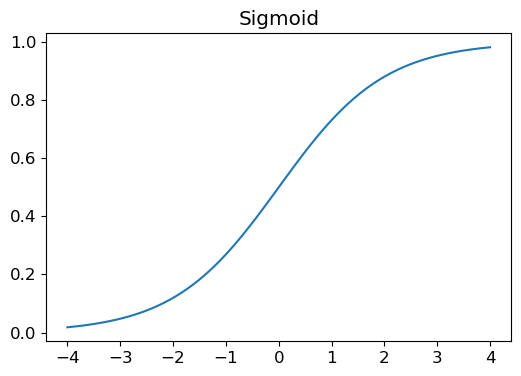

In [237]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [238]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

### 随机梯度下降（SGD）与小批量（Mini-Batches）

In [239]:
# 计算整个数据集的损失会耗费大量时间；而仅用单个样本计算损失则信息利用不足，会导致梯度估计非常不精确且不稳定
# 折中的方法：每次计算少量数据样本的平均损失。这少量样本被称为“小批量”（mini-batch），小批量中数据样本的数量则称为“批量大小”（batch size）。
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [240]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j'),(10, 'k'),(11, 'l'),(12, 'm'),(13, 'n'),(14, 'o'),(15, 'p'),(16, 'q'),(17, 'r'),(18, 's'),(19, 't')...]

In [241]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([17, 18, 10, 22,  8, 14]), ('r', 's', 'k', 'w', 'i', 'o')),
 (tensor([20, 15,  9, 13, 21, 12]), ('u', 'p', 'j', 'n', 'v', 'm')),
 (tensor([ 7, 25,  6,  5, 11, 23]), ('h', 'z', 'g', 'f', 'l', 'x')),
 (tensor([ 1,  3,  0, 24, 19, 16]), ('b', 'd', 'a', 'y', 't', 'q')),
 (tensor([2, 4]), ('c', 'e'))]

## 整合所有内容

In [243]:
weights = init_params((28*28,1))
bias = init_params(1)
weights.shape, bias.shape

(torch.Size([784, 1]), torch.Size([1]))

In [244]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [245]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [246]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [247]:
preds = linear1(batch)
preds

tensor([[ -4.4989],
        [-11.9460],
        [-13.8964],
        [-16.3760]], grad_fn=<AddBackward0>)

In [248]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.9972, grad_fn=<MeanBackward0>)

In [249]:
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0004), tensor([-0.0027]))

In [250]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [251]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0008), tensor([-0.0054]))

In [252]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0012), tensor([-0.0082]))

In [253]:
# 梯度发生变化了！原因在于loss.backward实际上会将loss的梯度加到当前存储的任何梯度上。因此，我们必须先将当前梯度设置为0：
weights.grad.zero_()
bias.grad.zero_();

In [254]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [255]:
(preds>0.0).float() == train_y[:4]

tensor([[False],
        [False],
        [False],
        [False]])

In [256]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [257]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.)

In [258]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [259]:
validate_epoch(linear1)

0.4764

In [260]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.6351

In [261]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.8377 0.9114 0.9315 0.9446 0.9495 0.9525 0.9564 0.9583 0.9608 0.9627 0.9637 0.9652 0.9656 0.9676 0.9681 0.9691 0.9701 0.9701 0.9696 0.9701 

### 创建优化器（optimizer）
我们将创建一个能为我们处理SGD步骤的对象。在PyTorch中，这个对象被称为优化器（optimizer）。

In [263]:
linear_model = nn.Linear(28*28,1)

In [264]:
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [265]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [266]:
opt = BasicOptim(linear_model.parameters(), lr)

In [267]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [268]:
validate_epoch(linear_model)

0.5817

In [269]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [270]:
train_model(linear_model, 20)

0.4932 0.7695 0.8594 0.9155 0.935 0.9482 0.9551 0.9629 0.9658 0.9673 0.9687 0.9721 0.9741 0.9746 0.9761 0.977 0.9775 0.978 0.9785 0.9785 

In [271]:
# fastai提供了SGD类，默认情况下，它的功能与我们的BasicOptim相同：
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.8188 0.8452 0.9136 0.9336 0.9477 0.956 0.9629 0.9658 0.9673 0.9692 0.9721 0.9736 0.9751 0.9756 0.9765 0.9775 0.978 0.978 0.978 

In [272]:
# fastai还提供了Learner.fit方法，我们可以用它来替代train_model。
# 要创建一个Learner，首先需要创建一个DataLoaders对象，方法是传入我们的训练集DataLoader和验证集DataLoader：
dls = DataLoaders(dl, valid_dl)

In [273]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [274]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636884,0.503709,0.495584,00:00
1,0.628973,0.354401,0.604024,00:00
2,0.231233,0.320271,0.671737,00:00
3,0.099927,0.144404,0.874387,00:00
4,0.050796,0.093996,0.919038,00:00
5,0.031698,0.071433,0.937193,00:00
6,0.023822,0.058538,0.952404,00:00
7,0.020353,0.050292,0.958783,00:00
8,0.018650,0.044688,0.964181,00:00
9,0.017673,0.040675,0.966143,00:00


## 添加非线性激活函数

In [275]:
# 线性分类器的功能非常有限。为了让它更复杂一些（并能处理更多任务），我们需要在两个线性分类器之间添加一些非线性的东西——这就是构成神经网络的关键。
def simple_net(xb): 
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [276]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

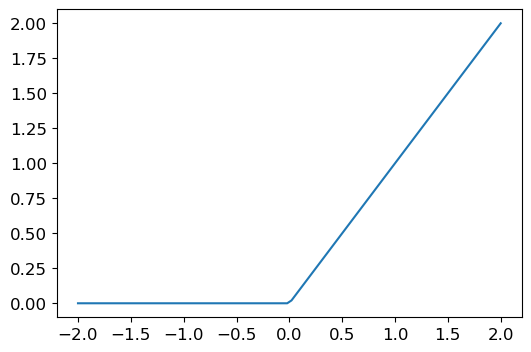

In [277]:
# res.max(tensor(0.0)) 这个小函数被称为整流线性单元（rectified linear unit），也称为ReLU。
# 它的作用只不过是 res.max(tensor(0.0))——换句话说，就是把所有负数替换成零。
plot_function(F.relu)

In [278]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [279]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [280]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.285318,0.421946,0.504416,00:00
1,0.139027,0.221552,0.813052,00:00
2,0.078371,0.113396,0.915604,00:00
3,0.052382,0.077478,0.941119,00:00
4,0.040178,0.060832,0.955348,00:00
5,0.033850,0.051388,0.963690,00:00
6,0.030154,0.045410,0.965653,00:00
7,0.027719,0.041309,0.966634,00:00
8,0.025947,0.038317,0.968106,00:00
9,0.024564,0.036023,0.968597,00:00


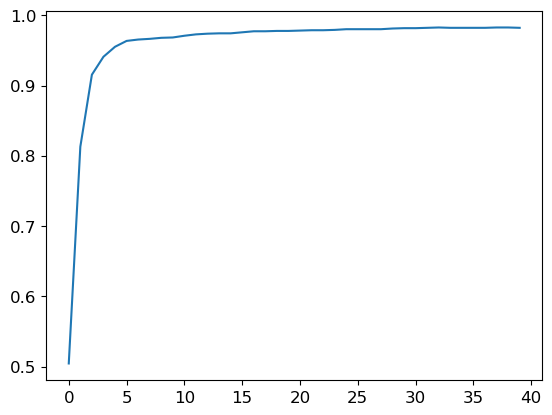

In [281]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [284]:
learn.recorder.values[-1][2]

0.98233562707901

### 加深网络深度

In [297]:
dls = ImageDataLoaders.from_folder(path)
learn = vision_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.143874,0.033312,0.991168,00:07
